In [57]:
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox

In [58]:
#map of mysore
G = ox.graph_from_place("Mysuru, Karnataka, India", network_type="drive")


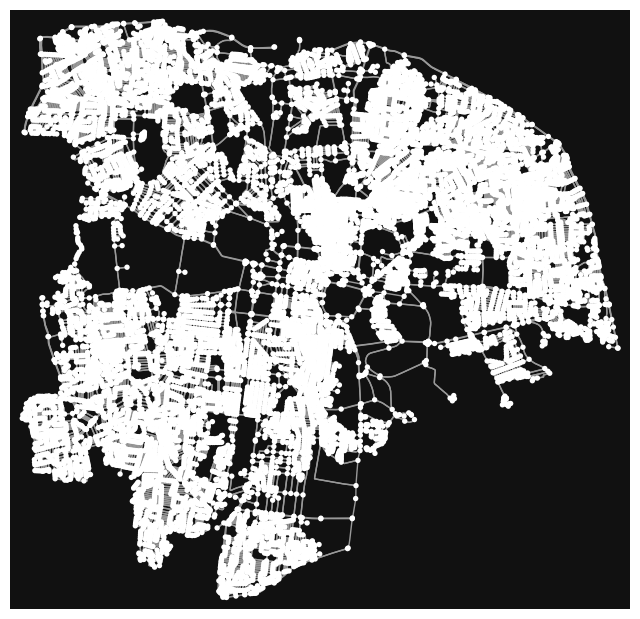

In [59]:
#print the map
fig, ax = ox.plot_graph(G)
plt.show()

In [60]:
#get hospitaals
hospitals = ox.features_from_place(
    "Mysuru, Karnataka, India",
    tags={"amenity": "hospital"}
)

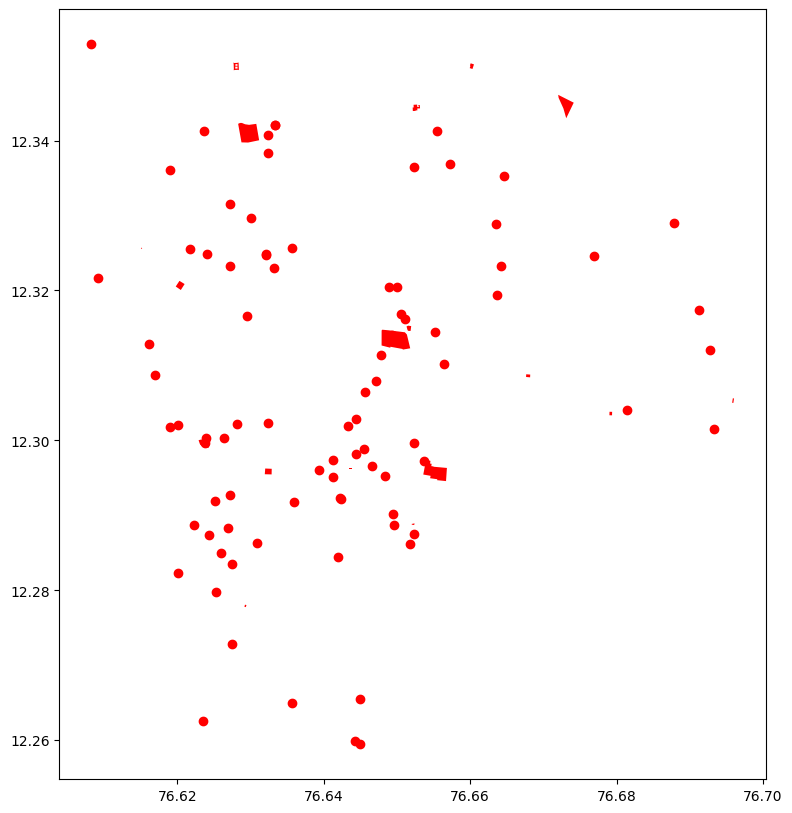

In [61]:
hospitals.plot(figsize=(10,10), color='red')
plt.show()

In [62]:
hospitals

geometry  \
element id                                                              
node    465192842                           POINT (76.63239 12.33832)   
        465196073                           POINT (76.62718 12.33155)   
        542383450                            POINT (76.64234 12.2922)   
        1221006184                          POINT (76.64496 12.26551)   
        1636785470                          POINT (76.64129 12.29514)   
...                                                               ...   
way     475505915   POLYGON ((76.62946 12.27802, 76.62926 12.27808...   
        498147947   POLYGON ((76.67903 12.30382, 76.67902 12.30335...   
        525517808   POLYGON ((76.62982 12.3421, 76.6308 12.34223, ...   
        741179471   POLYGON ((76.66007 12.35031, 76.66052 12.35016...   
        1428214845  POLYGON ((76.66334 12.32891, 76.66319 12.3288,...   

                     amenity emergency                                name  \
element id                                                                   
node    465192842   hospital       yes                        ESI Hospital   
        465196073   hospital       NaN           Adithya Adhikari Hospital   
        542383450   hospital       NaN                       Ashoka Clinic   
        1221006184  hospital       NaN                 Bone & Joint Clinic   
        1636785470  hospital        no                  Clumax Diagnostics   
...                      ...       ...                                 ...   
way     475505915   hospital       NaN                Arvinda Nursing Home   
        498147947   hospital       NaN                    MRC Eye Hospital   
        525517808   hospital       NaN                    P. K. Sanitorium   
        741179471   hospital       NaN                    Manipal Hospital   
        1428214845  hospital       NaN  Srinivasa Multispeciality Hospital   

                                 name:kn addr:district  \
element id                                               
node    465192842         ಇಎಸ್ಐ ಆಸ್ಪತ್ರೆ           NaN   
        465196073        ಆದಿತ್ಯ ಆಸ್ಪತ್ರೆ        Mysuru   
        542383450                    NaN           NaN   
        1221006184                   NaN           NaN   
        1636785470                   NaN           NaN   
...                                  ...           ...   
way     475505915   ಅರವಿಂದ ನರ್ಸಿಂಗ್ ಹೋಮ್        Mysuru   
        498147947                    NaN           NaN   
        525517808                    NaN           NaN   
        741179471        ಮಣಿಪಾಲ ಆಸ್ಪತ್ರೆ        Mysuru   
        1428214845                   NaN           NaN   

                                                            addr:full  \
element id                                                              
node    465192842                                                 NaN   
        465196073   417 Contour Road, Gokulam Ii Nd Stag Near Vija...   
        542383450                                                 NaN   
        1221006184                                                NaN   
        1636785470                                                NaN   
...                                                               ...   
way     475505915                     No. 644, 4Th Main, Arvind Nagar   
        498147947                                                 NaN   
        525517808                                                 NaN   
        741179471                 Siddique Nagar, Bannimantap, Mysuru   
        1428214845                                                NaN   

                   addr:postcode addr:state healthcare  ... website alt_name  \
element id                                              ...                    
node    465192842            NaN        NaN        NaN  ...     NaN      NaN   
        465196073         570002  Karnataka   hospital  ...     NaN      NaN   
        542383450            NaN        NaN        NaN  ...     NaN    

In [63]:
#print column names in hospitals
hospitals.columns

Index(['geometry', 'amenity', 'emergency', 'name', 'name:kn', 'addr:district',
       'addr:full', 'addr:postcode', 'addr:state', 'healthcare', 'source',
       'designation', 'addr:city', 'addr:housenumber', 'addr:street',
       'name:en', 'operator', 'operator:short', 'operator:wikidata',
       'description', 'ele', 'email', 'healthcare:speciality', 'operator:type',
       'website', 'alt_name', 'building', 'name:etymology:wikidata',
       'wikidata', 'wikimedia_commons', 'wikipedia', 'phone', 'type',
       'name:tr'],
      dtype='object')

In [64]:
locs = hospitals['geometry']

In [65]:
#find hospital row  with id 498147947
hospital_498147947 = hospitals[hospitals['name'] == "ESI Hospital"]
hospital_498147947

geometry   amenity emergency  \
element id                                                          
node    465192842   POINT (76.63239 12.33832)  hospital       yes   
        7562027211  POINT (76.64719 12.30793)  hospital       NaN   

                            name         name:kn addr:district  \
element id                                                       
node    465192842   ESI Hospital  ಇಎಸ್ಐ ಆಸ್ಪತ್ರೆ           NaN   
        7562027211  ESI Hospital  ಇಎಸ್ಐ ಆಸ್ಪತ್ರೆ        Mysuru   

                                                            addr:full  \
element id                                                              
node    465192842                                                 NaN   
        7562027211  ESI Hospital Road, Subbarayanakere, Chamrajpur...   

                   addr:postcode addr:state healthcare  ... website alt_name  \
element id                                              ...                    
node    465192842            NaN        NaN        NaN  ...     NaN      NaN   
        7562027211        570004  Karnataka   hospital  ...     NaN      NaN   

                   building name:etymology:wikidata wikidata  \
element id                                                     
node    465192842       NaN                     NaN      NaN   
        7562027211      NaN                     NaN      NaN   

                   wikimedia_commons wikipedia phone type name:tr  
element id                                                         
node    465192842                NaN       NaN   NaN  NaN     NaN  
        7562027211               NaN       NaN   NaN  NaN     NaN  

[2 rows x 34 columns]

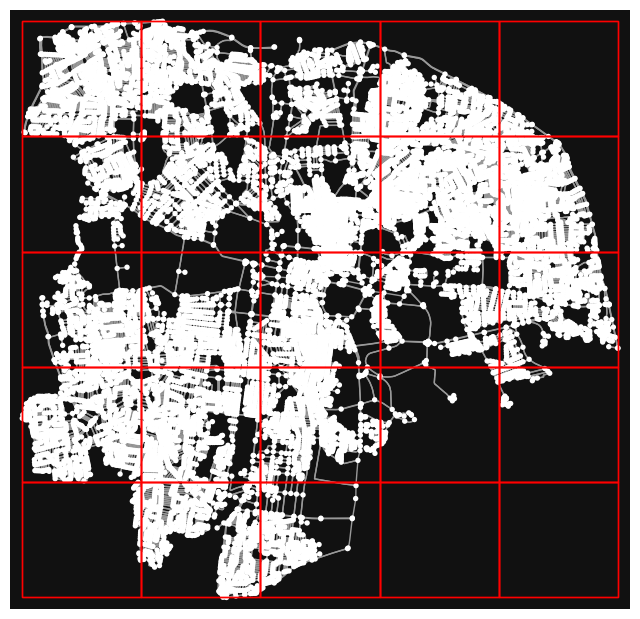

In [66]:
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import geopandas as gpd
from shapely.geometry import box

nodes_gdf, edges_gdf = ox.graph_to_gdfs(G)   # returns (nodes_gdf, edges_gdf)
bounds = edges_gdf.total_bounds              # [minx, miny, maxx, maxy]

minx, miny, maxx, maxy = bounds
nx = 5
ny = 5
x_step = (maxx - minx) / nx
y_step = (maxy - miny) / ny

zones = []
zone_polys = []
for i in range(nx):
    for j in range(ny):
        zminx = minx + i * x_step
        zminy = miny + j * y_step
        zmaxx = minx + (i + 1) * x_step
        zmaxy = miny + (j + 1) * y_step
        zone = (zminx, zminy, zmaxx, zmaxy)
        zones.append(zone)
        zone_polys.append(box(zminx, zminy, zmaxx, zmaxy))

# create a single GeoDataFrame with all zones
zones_gdf = gpd.GeoDataFrame({
    'zone_id': range(len(zone_polys)),
    'i': [int(idx // ny) for idx in range(len(zone_polys))],
    'j': [int(idx % ny) for idx in range(len(zone_polys))],
    'geometry': zone_polys
}, crs=nodes_gdf.crs)

# also create individual GeoDataFrames per zone (list)
zone_gdfs = []
for idx, geom in enumerate(zone_polys):
    gdf = gpd.GeoDataFrame({'zone_id':[idx], 'geometry':[geom]}, crs=nodes_gdf.crs)
    zone_gdfs.append(gdf)

fig, ax = ox.plot_graph(G, show=False, close=False)
if isinstance(ax, (list, tuple, np.ndarray)):
    ax = ax[0]

for zone in zones:
    zminx, zminy, zmaxx, zmaxy = zone
    rect = Rectangle((zminx, zminy), zmaxx - zminx, zmaxy - zminy,
                     fill=False, edgecolor='red', linewidth=1, zorder=3)
    ax.add_patch(rect)

# plot combined zones GeoDataFrame on top
zones_gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1, zorder=4)

plt.show()


In [67]:
# Print zones and hospitals per zone
import geopandas as gpd
# show overall shapes and columns
print('zones_gdf shape:', zones_gdf.shape)
print('zones_gdf columns:', list(zones_gdf.columns))
print('hospitals shape (before):', hospitals.shape)
print('hospitals columns:', list(hospitals.columns))

# ensure CRS match for spatial join
if hospitals.crs != zones_gdf.crs:
    hospitals = hospitals.to_crs(zones_gdf.crs)

# spatial join: attach zone_id to each hospital (if any)
joined = gpd.sjoin(hospitals, zones_gdf[['zone_id','geometry']], how='left', predicate='within')

# iterate zones and print counts and a few rows
for idx, zrow in zones_gdf.iterrows():
    zid = zrow['zone_id']
    zone_hosp = joined[joined['zone_id'] == zid] if 'zone_id' in joined.columns else joined[[]]
    print(f"Zone {zid} (i={zrow.get('i')}, j={zrow.get('j')}): {len(zone_hosp)} hospitals; hospitals shape: {zone_hosp.shape}")
    if len(zone_hosp) > 0:
        # print up to 5 hospital rows (name and geometry)
        cols = [c for c in ['name','geometry'] if c in zone_hosp.columns]
        print(zone_hosp[cols].head())

# list zones with no hospitals
empty_zones = [int(zrow['zone_id']) for _, zrow in zones_gdf.iterrows() if len(joined[joined['zone_id'] == zrow['zone_id']]) == 0]
print('Zones with no hospitals:', empty_zones)

zones_gdf shape: (25, 4)
zones_gdf columns: ['zone_id', 'i', 'j', 'geometry']
hospitals shape (before): (105, 34)
hospitals columns: ['geometry', 'amenity', 'emergency', 'name', 'name:kn', 'addr:district', 'addr:full', 'addr:postcode', 'addr:state', 'healthcare', 'source', 'designation', 'addr:city', 'addr:housenumber', 'addr:street', 'name:en', 'operator', 'operator:short', 'operator:wikidata', 'description', 'ele', 'email', 'healthcare:speciality', 'operator:type', 'website', 'alt_name', 'building', 'name:etymology:wikidata', 'wikidata', 'wikimedia_commons', 'wikipedia', 'phone', 'type', 'name:tr']
Zone 0 (i=0, j=0): 0 hospitals; hospitals shape: (0, 36)
Zone 1 (i=0, j=1): 0 hospitals; hospitals shape: (0, 36)
Zone 2 (i=0, j=2): 3 hospitals; hospitals shape: (3, 36)
                                                                 name  \
element id                                                              
node    7202979471  All India Institute of Speech and Hearing, Mysore   
  

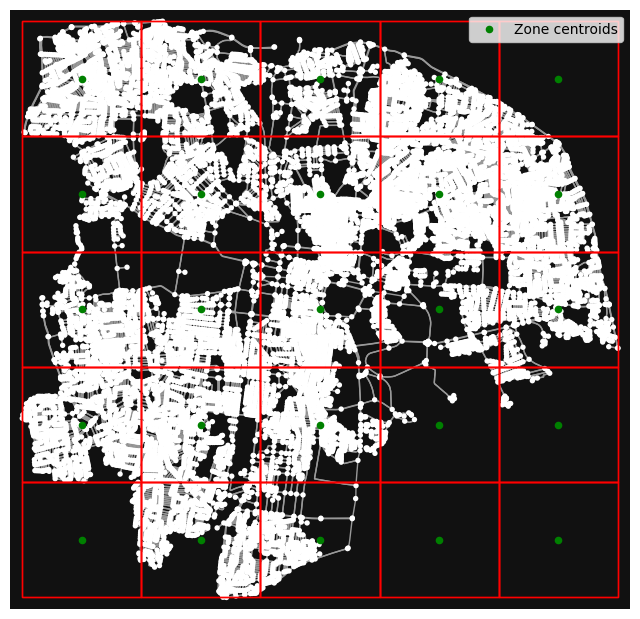

In [68]:
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import geopandas as gpd
import numpy as np
from shapely.geometry import box

# 1. Road graph and bounds
nodes_gdf, edges_gdf = ox.graph_to_gdfs(G)   # G already created earlier
bounds = edges_gdf.total_bounds              # [minx, miny, maxx, maxy]
minx, miny, maxx, maxy = bounds

nx = 5
ny = 5
x_step = (maxx - minx) / nx
y_step = (maxy - miny) / ny

zones = []
zone_polys = []
for i in range(nx):
    for j in range(ny):
        zminx = minx + i * x_step
        zminy = miny + j * y_step
        zmaxx = minx + (i + 1) * x_step
        zmaxy = miny + (j + 1) * y_step
        zone = (zminx, zminy, zmaxx, zmaxy)
        zones.append(zone)
        zone_polys.append(box(zminx, zminy, zmaxx, zmaxy))

# 2. GeoDataFrame of zones in same CRS as graph
zones_gdf = gpd.GeoDataFrame(
    {
        "zone_id": range(len(zone_polys)),
        "i": [int(idx // ny) for idx in range(len(zone_polys))],
        "j": [int(idx % ny) for idx in range(len(zone_polys))],
        "geometry": zone_polys,
    },
    crs=nodes_gdf.crs,
)

# 3. Compute centroids in a projected CRS then bring them back

# if graph is in geographic CRS (EPSG 4326) reproject to UTM for centroid
if zones_gdf.crs is None:
    zones_gdf = zones_gdf.set_crs(epsg=4326)

zones_proj = zones_gdf.to_crs(epsg=32643)         # UTM zone for Mysuru region
zones_proj["centroid_proj"] = zones_proj.geometry.centroid

# back to original CRS of graph for plotting with G
centroids_ll = zones_proj["centroid_proj"].to_crs(zones_gdf.crs)
zones_gdf["centroid"] = centroids_ll

# 4. Plot graph, red grid, and centroids on the same axes

fig, ax = ox.plot_graph(G, show=False, close=False)

# in case ox returns array of axes
if isinstance(ax, (list, tuple, np.ndarray)):
    ax = ax[0]

# draw red rectangles for each grid cell
for zone in zones:
    zminx, zminy, zmaxx, zmaxy = zone
    rect = Rectangle(
        (zminx, zminy),
        zmaxx - zminx,
        zmaxy - zminy,
        fill=False,
        edgecolor="red",
        linewidth=1,
        zorder=3,
    )
    ax.add_patch(rect)

# optional: plot zone polygons again (outline)
zones_gdf.plot(
    ax=ax,
    facecolor="none",
    edgecolor="red",
    linewidth=1,
    zorder=4,
)

# plot centroids as green dots
ax.scatter(
    zones_gdf["centroid"].x,
    zones_gdf["centroid"].y,
    s=20,
    color="green",
    zorder=5,
    label="Zone centroids",
)

ax.legend()
plt.show()


In [69]:
valid_zones = []
place = "Mysuru, Karnataka, India"
city_gdf = ox.geocode_to_gdf(place)
city_gdf = city_gdf.to_crs(zones_gdf.crs)
city_poly = city_gdf.geometry.iloc[0]
for idx, poly in enumerate(zones_gdf.geometry):
    if poly.intersects(city_poly):
        valid_zones.append(idx)

print("Valid zone indices:", valid_zones)
print("Total valid zones:", len(valid_zones))


Valid zone indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24]
Total valid zones: 23


In [70]:
filtered_zones_gdf = zones_gdf.iloc[valid_zones].reset_index(drop=True)
print("Zones after filtering:", len(filtered_zones_gdf))

# compute centroids properly
zones_proj = filtered_zones_gdf.to_crs(epsg=32643)
zones_proj["centroid_proj"] = zones_proj.geometry.centroid
centroids_ll = zones_proj["centroid_proj"].to_crs(epsg=4326)

filtered_zones_gdf = filtered_zones_gdf.to_crs(epsg=4326)
filtered_zones_gdf["centroid"] = centroids_ll

Zones after filtering: 23


In [71]:
# get hospitals in Mysuru
tags = {"amenity": "hospital"}
hospitals = ox.features_from_place(place, tags=tags)

# keep only those intersecting the city
hospitals = hospitals.to_crs(city_gdf.crs)
hospitals = hospitals[hospitals.geometry.intersects(city_poly)]

print("Hospitals in city:", len(hospitals))

# centroids for hospitals
hosp_proj = hospitals.to_crs(epsg=32643)
hosp_proj["centroid_proj"] = hosp_proj.geometry.centroid
hosp_centroids_ll = hosp_proj["centroid_proj"].to_crs(epsg=4326)

candidate_bases_gdf = gpd.GeoDataFrame(
    {"geometry": hosp_centroids_ll},
    crs="EPSG:4326"
)

print("Candidate bases:", len(candidate_bases_gdf))


Hospitals in city: 105
Candidate bases: 105


In [72]:
import openrouteservice as ors
import numpy as np

ORS_API_KEY = "eyJvcmciOiI1YjNjZTM1OTc4NTExMTAwMDFjZjYyNDgiLCJpZCI6IjQ1NjVmZDRlZjA3ZjQ2ZDBiYzg0ZmY0NDEwMjlmYWM2IiwiaCI6Im11cm11cjY0In0="
client = ors.Client(key=ORS_API_KEY)


In [73]:
# Ensure everything is in lat lon
filtered_zones_gdf = filtered_zones_gdf.to_crs(epsg=4326)
candidate_bases_gdf = candidate_bases_gdf.to_crs(epsg=4326)

# Extract coordinates
zone_lats = filtered_zones_gdf["centroid"].y.values
zone_lons = filtered_zones_gdf["centroid"].x.values

base_lats = candidate_bases_gdf.geometry.y.values
base_lons = candidate_bases_gdf.geometry.x.values

num_zones = len(zone_lats)
num_bases = len(base_lats)

print("Zones:", num_zones, "Bases:", num_bases)

# Build ORS coordinate lists (each entry is [lon, lat])
base_coords = [[float(base_lons[j]), float(base_lats[j])] for j in range(num_bases)]
zone_coords = [[float(zone_lons[i]), float(zone_lats[i])] for i in range(num_zones)]

# ORS expects one combined list
locations = base_coords + zone_coords

sources = list(range(num_bases))  # bases
destinations = list(range(num_bases, num_bases + num_zones))  # zones


Zones: 23 Bases: 105


In [74]:
matrix_result = client.distance_matrix(
    locations=locations,
    profile="driving-car",
    metrics=["duration"],
    sources=sources,
    destinations=destinations
)

# durations is [num_bases x num_zones] in seconds
durations = np.array(matrix_result["durations"])
print("Matrix shape (bases x zones):", durations.shape)


Matrix shape (bases x zones): (105, 23)


In [75]:
T = durations.T / 60.0   # minutes
print("Final matrix shape (zones x bases):", T.shape)


Final matrix shape (zones x bases): (23, 105)


In [76]:
demand_nodes = list(range(num_zones))
candidate_bases = list(range(num_bases))

weights = {i: 1.0 for i in demand_nodes}   # replace later with population weights

# Convert T into dictionary form
time_matrix = {}
for i in demand_nodes:
    time_matrix[i] = {}
    for j in candidate_bases:
        time_matrix[i][j] = float(T[i, j])


In [77]:
import pulp

def solve_location_problem(K, demand_nodes, candidate_bases, weights, time_matrix):
    prob = pulp.LpProblem(f"Ambulance_Placement_K_{K}", pulp.LpMinimize)

    # Variables
    y = pulp.LpVariable.dicts("Open", candidate_bases, cat="Binary")
    x = pulp.LpVariable.dicts("Assign", (demand_nodes, candidate_bases), cat="Binary")

    # Objective
    prob += pulp.lpSum(
        weights[i] * time_matrix[i][j] * x[i][j]
        for i in demand_nodes
        for j in candidate_bases
    )

    # Each zone assigned to exactly one base
    for i in demand_nodes:
        prob += pulp.lpSum(x[i][j] for j in candidate_bases) == 1

    # Assignment allowed only if base is open
    for i in demand_nodes:
        for j in candidate_bases:
            prob += x[i][j] <= y[j]

    # Limit number of bases
    prob += pulp.lpSum(y[j] for j in candidate_bases) <= K

    # Solve
    prob.solve(pulp.PULP_CBC_CMD(msg=True))

    open_bases = [j for j in candidate_bases if y[j].value() > 0.5]

    # Results aggregate
    assignments = {}
    times = []
    total_weight = 0
    weighted_sum = 0

    for i in demand_nodes:
        for j in candidate_bases:
            if x[i][j].value() > 0.5:
                assignments[i] = j
                w = weights[i]
                t = time_matrix[i][j]
                times.append(t)
                weighted_sum += w * t
                total_weight += w
                break

    avg_time = weighted_sum / total_weight
    max_time = max(times)

    return {
        "status": pulp.LpStatus[prob.status],
        "open_bases": open_bases,
        "assignments": assignments,
        "avg_time": avg_time,
        "max_time": max_time
    }


In [78]:
Ks = range(2, 40)  # choose range

results_k = []
results_avg = []
results_max = []

for K in Ks:
    print("Solving for K =", K)
    res = solve_location_problem(K, demand_nodes, candidate_bases, weights, time_matrix)
    print(res)
    results_k.append(K)
    results_avg.append(res["avg_time"])
    results_max.append(res["max_time"])


Solving for K = 2
{'status': 'Optimal', 'open_bases': [76, 95], 'assignments': {0: 76, 1: 76, 2: 76, 3: 76, 4: 76, 5: 76, 6: 76, 7: 76, 8: 76, 9: 76, 10: 95, 11: 95, 12: 95, 13: 95, 14: 95, 15: 95, 16: 95, 17: 95, 18: 95, 19: 95, 20: 95, 21: 95, 22: 95}, 'avg_time': 5.754804347826087, 'max_time': 10.192499999999999}
Solving for K = 3
{'status': 'Optimal', 'open_bases': [13, 48, 77], 'assignments': {0: 77, 1: 77, 2: 48, 3: 48, 4: 48, 5: 77, 6: 77, 7: 77, 8: 48, 9: 48, 10: 77, 11: 77, 12: 77, 13: 48, 14: 48, 15: 77, 16: 13, 17: 13, 18: 13, 19: 13, 20: 13, 21: 13, 22: 13}, 'avg_time': 4.951615942028985, 'max_time': 9.907}
Solving for K = 4
{'status': 'Optimal', 'open_bases': [13, 48, 76, 97], 'assignments': {0: 76, 1: 76, 2: 76, 3: 48, 4: 48, 5: 97, 6: 76, 7: 76, 8: 48, 9: 48, 10: 97, 11: 97, 12: 97, 13: 48, 14: 48, 15: 97, 16: 97, 17: 13, 18: 13, 19: 97, 20: 13, 21: 13, 22: 13}, 'avg_time': 4.422427536231885, 'max_time': 8.8995}
Solving for K = 5
{'status': 'Optimal', 'open_bases': [0, 1

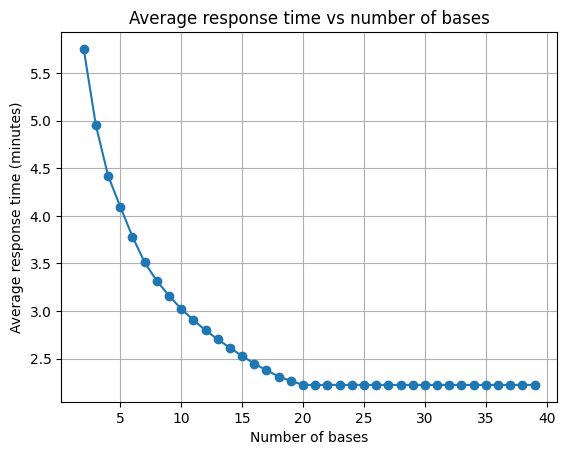

In [79]:
import matplotlib.pyplot as plt

plt.plot(results_k, results_avg, marker="o")
plt.xlabel("Number of bases")
plt.ylabel("Average response time (minutes)")
plt.grid(True)
plt.title("Average response time vs number of bases")
plt.show()


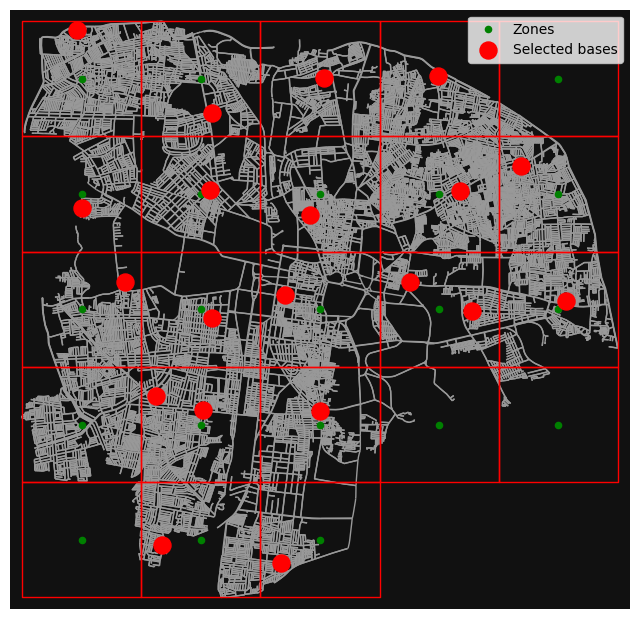

In [80]:
K = 20
res = solve_location_problem(K, demand_nodes, candidate_bases, weights, time_matrix)
open_bases = res["open_bases"]

base_nodes = candidate_bases_gdf.iloc[open_bases]
zone_nodes = filtered_zones_gdf

fig, ax = ox.plot_graph(G, show=False, close=False, node_size=0, edge_color="#999999")

zone_nodes.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=1)
ax.scatter(zone_lons, zone_lats, s=20, color="green", label="Zones")

ax.scatter(
    base_nodes.geometry.x,
    base_nodes.geometry.y,
    s=150,
    color="red",
    label="Selected bases"
)

ax.legend()
plt.show()


In [81]:
import numpy as np

# results_k and results_avg filled by your loop

eps = 1e-6   # tiny tolerance for floating point noise
plateau_K = None

for idx in range(len(results_k) - 1):
    curr = results_avg[idx]
    nxt = results_avg[idx + 1]
    # if next K does not give any improvement (within eps)
    if curr - nxt < eps:
        plateau_K = results_k[idx + 1]
        break

print("Plateau starts around K =", plateau_K)


Plateau starts around K = 21


In [82]:
min_avg = min(results_avg)

eps = 1e-6
candidate_indices = [i for i, t in enumerate(results_avg) if t <= min_avg + eps]

best_index = candidate_indices[0]
best_K = results_k[best_index]

print("Best K by global minimum rule:", best_K)
print("Minimum average time:", results_avg[best_index])


Best K by global minimum rule: 20
Minimum average time: 2.222405797101449
